🦜 Uncomment the following code for the [TidyTuesday Bird Bath dataset](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-08-31).🦉

In [2]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
df_birdbath = read_csv(
     'https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-08-31/bird_baths.csv?raw=true',
     col_types = cols()
)

df_birdbath %>% head()

survey_year,urban_rural,bioregions,bird_type,bird_count
<dbl>,<chr>,<chr>,<chr>,<dbl>
2014,Urban,South Eastern Queensland,Bassian Thrush,0
2014,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2014,Urban,South Eastern Queensland,Wild Duck,0
2014,Urban,South Eastern Queensland,Willie Wagtail,0
2014,Urban,South Eastern Queensland,Regent Bowerbird,0
2014,Urban,South Eastern Queensland,Rufous Fantail,0


Each row represents the number of times a type of bird was observed at a bird bath in the survey year.

We want to just work with the most numerous birds for baths that have been categorized as "Urban" or "Rural."

Find the top fifteen bird types by total `bird_count` after filtering out baths where `urban_rural` category is not provided. Capture this vector with a variable called `top15_bird_types`. 

Hint: remember `pull` and `slice_max` 

In [25]:
top15_bird_types = df_birdbath |>
    filter(!is.na(urban_rural)) |> # ! = if urban/rural is not NA, then we are going to keep that row
    group_by(bird_type) |>
    summarize(total_bird_count = sum(bird_count)) |> #number of times bird type was observed in bird bath across data
    slice_max(order_by = total_bird_count, n = 15) |>
    pull(bird_type)

print(top15_bird_types)

 [1] "Noisy Miner"        "Australian Magpie"  "Rainbow Lorikeet"  
 [4] "Red Wattlebird"     "Superb Fairy-wren"  "Magpie-lark"       
 [7] "Pied Currawong"     "Crimson Rosella"    "Eastern Spinebill" 
[10] "Spotted Dove"       "Lewin's Honeyeater" "Satin Bowerbird"   
[13] "Crested Pigeon"     "Grey Fantail"       "Red-browed Finch"  


1. Create a table of just the top birds using the vector of top 15 bird types to filter. Exclude rows with `NA` vlues for `urban_rural`.
1. Group by `bird_type` and `urban_rural` and find the mean `bird_count` for each group.
1. Sort the factor levels for `bird_type` by `bird_count` value at `Rural` baths.
1. Capture the output of these operations under a new variable.

Your final table will have three columns: 1) `bird_type`, 2) `urban_rural` and 3) `mean_bird_count`

In [59]:
df_birdbath2 = df_birdbath |>
    filter(!is.na(urban_rural), bird_type %in% top15_bird_types) |>
    group_by(bird_type, urban_rural) |>
    summarize(mean_bird_count = mean(bird_count), .groups = 'drop') |>
    arrange(urban_rural, mean_bird_count) |>
    mutate(bird_type = fct_inorder(bird_type))

df_birdbath2 |> head()

bird_type,urban_rural,mean_bird_count
<fct>,<chr>,<dbl>
Spotted Dove,Rural,0.03741497
Crested Pigeon,Rural,0.09523810
Pied Currawong,Rural,0.10884354
Magpie-lark,Rural,0.11224490
Red Wattlebird,Rural,0.11904762
Rainbow Lorikeet,Rural,0.13605442


In [60]:
df_birdbath2 |>
    pull(bird_type)

[1] Spotted Dove       Crested Pigeon     Pied Currawong     Magpie-lark       
 [5] Red Wattlebird     Rainbow Lorikeet   Satin Bowerbird    Noisy Miner       
 [9] Crimson Rosella    Australian Magpie  Red-browed Finch   Grey Fantail      
[13] Lewin's Honeyeater Eastern Spinebill  Superb Fairy-wren 
 [ reached getOption("max.print") -- omitted 15 entries ]
15 Levels: Spotted Dove Crested Pigeon Pied Currawong ... Superb Fairy-wren

Make a "Urban"/"Rural" [Cleveland dot chart](https://uc-r.github.io/public/images/visual/cleveland-dotplots/unnamed-chunk-10-1.png) figure with your new table. 

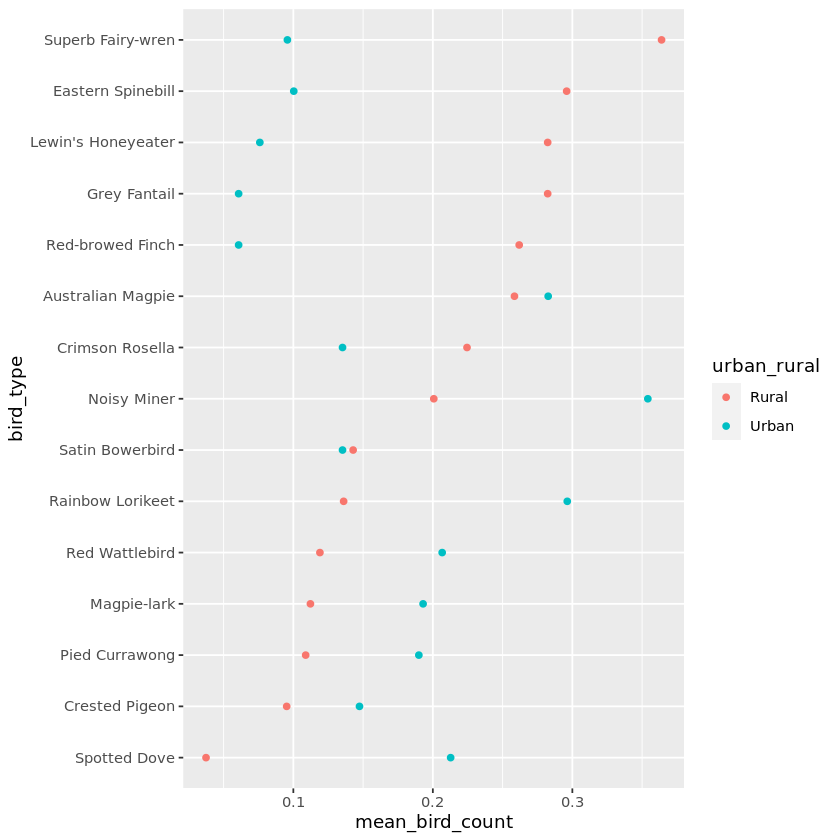

In [61]:
p = ggplot(df_birdbath2, aes(x = mean_bird_count, y = bird_type, color = urban_rural)) + 
    geom_point() + 

p

If we want to add "segments" to our dot chart, we need to re-shape our data into "wide" format. Specifically we want to have "Urban" and "Rural" as **columns** instead of **values**.

Use `pivot_wider` to make this wide table, capture it, and use `geom_segment` in combination with your wide table to add segments to your Cleveland dot chart from above 👆.

In [76]:
df_birdbath3 = df_birdbath2 |>
    pivot_wider(names_from = 'urban_rural', values_from = 'mean_bird_count')

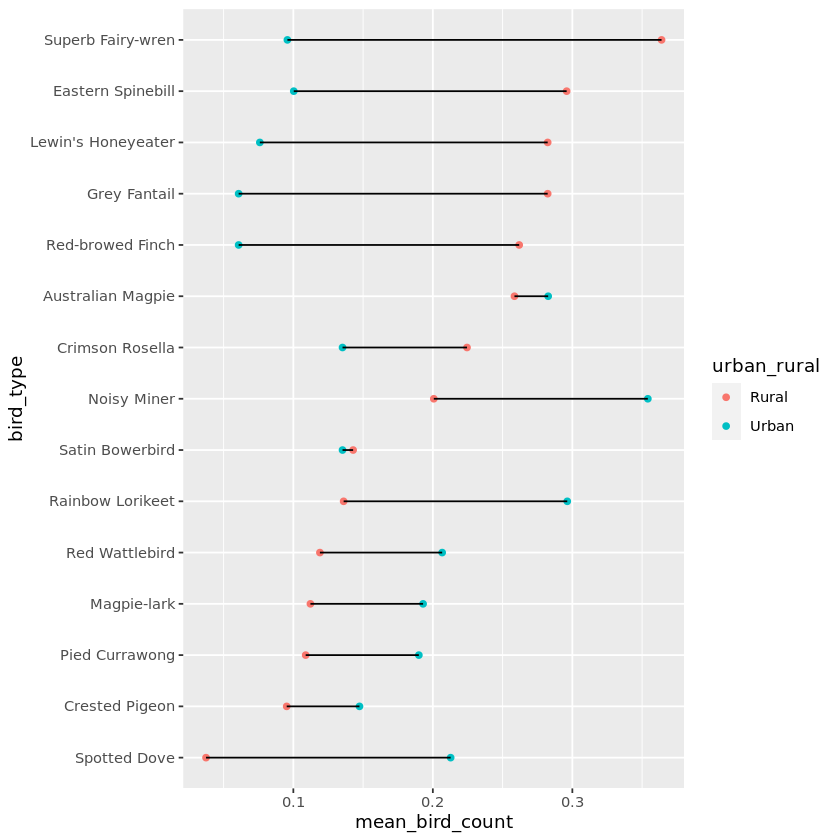

In [77]:
p = ggplot(df_birdbath2, aes(x = mean_bird_count, y = bird_type)) +
    geom_point(aes(color = urban_rural)) +
    geom_segment(aes(y = bird_type, yend = bird_type, x = Rural, xend = Urban), data = df_birdbath3)

p

(Uncomment the code and make the cell below markdown to see my solution.)

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_01_pivot_chart.png?raw=true)